In [1]:
# importing the required libraries
import os
import glob as gb
import cv2
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from PIL import Image
import matplotlib.image as implt
from tqdm import tqdm

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Path variables

train_path, test_path, pred_path = 'seg_train/seg_train', 'seg_test/seg_test', 'seg_pred/seg_pred'

In [3]:
print('====================> Train Data <========================')
for folder in os.listdir(train_path):
    trainFiles=gb.glob(pathname=train_path + '/' + folder +'/*.jpg')
    print(f'{len(trainFiles):4} images are founnd in {folder} folder.')

====================> Train Data <========================
2191 images are founnd in buildings folder.
2271 images are founnd in forest folder.
2404 images are founnd in glacier folder.
2512 images are founnd in mountain folder.
2274 images are founnd in sea folder.
2382 images are founnd in street folder.


In [4]:
print('====================> Test Data <============================')
for folder in os.listdir(test_path):
    testFiles=gb.glob(pathname=test_path + '/' + folder +'/*.jpg')
    print(f'{len(testFiles):4} images are founnd in {folder} folder.')

====================> Test Data <============================
 437 images are founnd in buildings folder.
 474 images are founnd in forest folder.
 553 images are founnd in glacier folder.
 525 images are founnd in mountain folder.
 510 images are founnd in sea folder.
 501 images are founnd in street folder.


In [5]:
print('================> Prediction Data <==========================')
files= gb.glob(pathname=str(pred_path + "/*.jpg"))
print(f"{len(files)} images are found in predict data.")

================> Prediction Data <==========================
7301 images are found in predict data.


In [6]:
# initializing the class variables

class_names = ['buildings', 'forest','glacier','mountain','sea','street']
class_labels = {class_names[i]:i for i in range(len(class_names))}
class_labels

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [7]:
# Loading the dataset

def loading_dataset(data_dir_path):
    images, labels = [], []
    for class_name in class_names:
            file_path = os.path.join(data_dir_path,class_name)
            for img in os.listdir(file_path):
                img_array = cv2.imread(os.path.join(file_path,img))
                img_array = cv2.resize(img_array,(50,50))
                images.append(img_array)
                labels.append(class_labels[class_name])
    
    images, labels = np.array(images), np.array(labels)
    return (images,labels)

In [8]:
# Loading the dataset of trained and tested
(X_train,Y_train) = loading_dataset(train_path)
(X_test,Y_test) = loading_dataset(test_path)

print('Total Number of Train images = '+ str(Y_train.shape[0]))
print('Total Number of Test images = '+ str(Y_test.shape[0]))

Total Number of Train images = 14034
Total Number of Test images = 3000


In [9]:
#visualizing the sample images

def visualize_sample_images(X, Y):
    
    fig,ax = plt.subplots(3,3,figsize = (8,8))
    for i in range(3):
        for j in range(3):
            index = np.random.randint(X.shape[0])
            ax[i][j].imshow(X[index])
            ax[i][j].set_title(class_names[Y[index]])

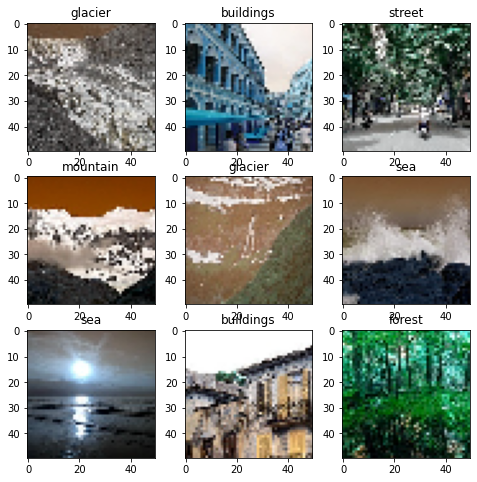

In [10]:
#visualizing the sample training images

visualize_sample_images(X_train, Y_train)

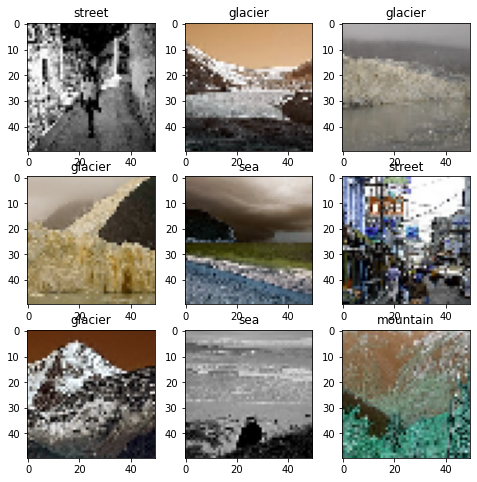

In [11]:
#visualizing the sample testing images

visualize_sample_images(X_test, Y_test)

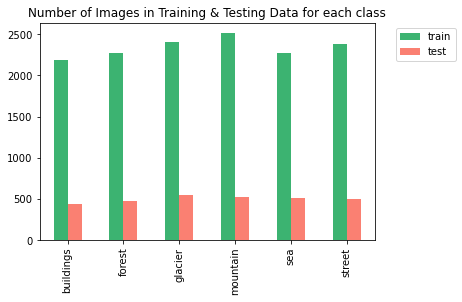

In [12]:
# Visualizing the boxplot for data for train, test for each class label

datatrain, CountTrainImag = np.unique(Y_train, return_counts=True)
datatest, CountTestImag = np.unique(Y_test, return_counts=True)
pd.DataFrame({'train': CountTrainImag,'test': CountTestImag}, index=class_labels).plot.bar(color={'train':'mediumseagreen','test':'salmon'})
plt.title('Number of Images in Training & Testing Data for each class')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

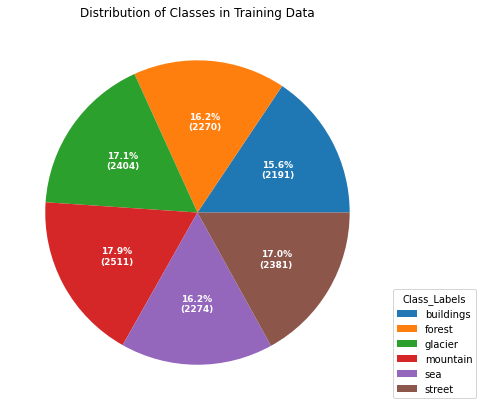

In [13]:
# Visualizing the pie chart data visualization for training data

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(9, 7), subplot_kw=dict(aspect="equal"))

class_names = class_names
count_train = list(CountTrainImag)

popln_pct, texts, autotexts = ax.pie(count_train, autopct=lambda pct: func(pct, count_train),
                                  textprops=dict(color="w"))

ax.legend(popln_pct, class_names,
          title="Class_Labels",
          loc="lower left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=9, weight="bold")

ax.set_title("Distribution of Classes in Training Data")

plt.show()

In [14]:
# Rescaling the images

X_train, X_test = X_train/255.0, X_test /255.0

In [15]:
# importing the Keras models libraries for implementation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout

In [17]:
# CNN Model

def CNN_Model():
    model = Sequential([
        Conv2D(filters=200, kernel_size=(3, 3), input_shape=(50, 50, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(filters=150, kernel_size=(3, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        Flatten(),
        Dense(units=150, activation='relu'),
        Dense(units=100, activation='relu'),
        Dense(units=70, activation='relu'),
        Dense(units=50, activation='relu'),
        Dropout(0.5),
        Dense(units=6, activation='softmax')
    ])
    
    return model

In [18]:
cnn_model = CNN_Model()

In [19]:
# applying adam optimiser with metrics as accuracy
cnn_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
cnn_model.summary() # summarizing our model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 200)       5600      
                                                                 
 activation (Activation)     (None, 48, 48, 200)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 200)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 150)       270150    
                                                                 
 activation_1 (Activation)   (None, 22, 22, 150)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 150)      0         
 2D)                                                  

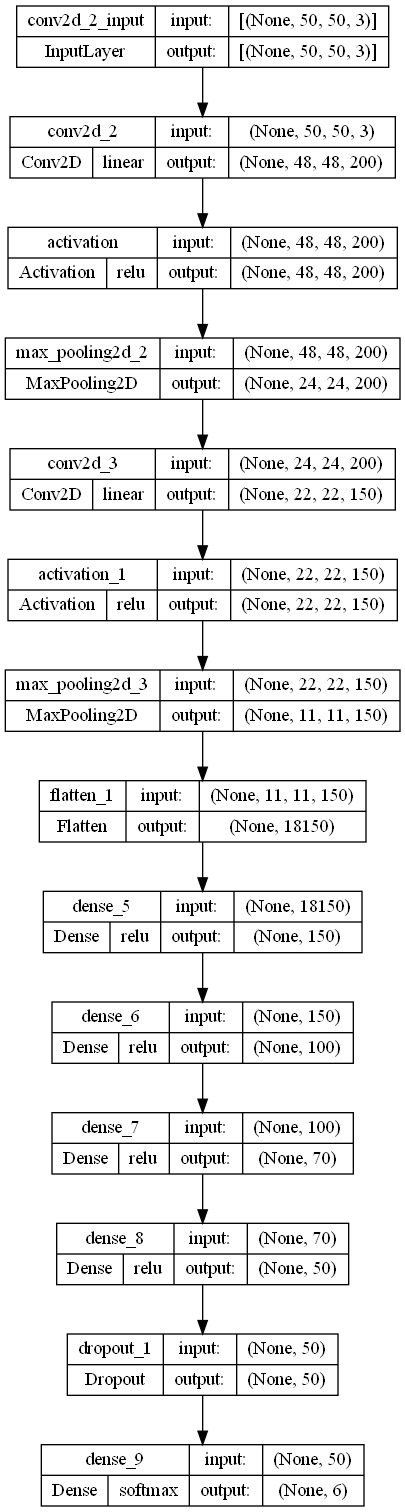

In [25]:
import tensorflow as tf

tf.keras.utils.plot_model(cnn_model,show_shapes=True,show_layer_names=True,
                          show_layer_activations=True, rankdir='TB', expand_nested=False)

In [23]:
# training the model
cnn_model_train = cnn_model.fit(X_train,Y_train, batch_size= 64,epochs=17)

Epoch 1/17
220/220 [==============================] - 101s 456ms/step - loss: 0.5466 - accuracy: 0.8192
Epoch 2/17
220/220 [==============================] - 109s 495ms/step - loss: 0.4862 - accuracy: 0.8411
Epoch 3/17
220/220 [==============================] - 109s 496ms/step - loss: 0.4090 - accuracy: 0.8666
Epoch 4/17
220/220 [==============================] - 118s 538ms/step - loss: 0.3562 - accuracy: 0.8833
Epoch 5/17
220/220 [==============================] - 114s 519ms/step - loss: 0.3139 - accuracy: 0.9013
Epoch 6/17
220/220 [==============================] - 105s 477ms/step - loss: 0.2698 - accuracy: 0.9143
Epoch 7/17
220/220 [==============================] - 104s 471ms/step - loss: 0.2066 - accuracy: 0.9377
Epoch 8/17
220/220 [==============================] - 101s 461ms/step - loss: 0.1994 - accuracy: 0.9382
Epoch 9/17
220/220 [==============================] - 82s 372ms/step - loss: 0.1616 - accuracy: 0.9507
Epoch 10/17
220/220 [==============================] - 83s 379ms/

In [24]:
# evaluating the model
cnn_model.evaluate(X_test, Y_test, verbose=1)

94/94 [==============================] - 5s 47ms/step - loss: 1.5540 - accuracy: 0.7670


[1.5539560317993164, 0.7670000195503235]

In [26]:
# 10-Fold cross Validation

from keras.callbacks import ModelCheckpoint, EarlyStopping

def KFoldCrossValidation(K_Folds, X, Y, cnn_model):
    folds_data = []
    for i in range(K_Folds):
        print("Training on Fold: ",i+1)
        folds_data.append(cnn_model.fit(X, Y, epochs=17, callbacks=[EarlyStopping(monitor='val_loss', patience=2, verbose=1)], verbose=1, validation_split=0.1))
        print("======================================")
    
    return folds_data

In [27]:
cnn_fold_model = KFoldCrossValidation(10, X_train, Y_train, cnn_model)

Training on Fold:  1
Epoch 1/17
395/395 [==============================] - 74s 187ms/step - loss: 0.1818 - accuracy: 0.9461 - val_loss: 0.1324 - val_accuracy: 0.9516
Epoch 2/17
395/395 [==============================] - 75s 189ms/step - loss: 0.1264 - accuracy: 0.9617 - val_loss: 0.0158 - val_accuracy: 0.9943
Epoch 3/17
395/395 [==============================] - 73s 185ms/step - loss: 0.1039 - accuracy: 0.9681 - val_loss: 0.1052 - val_accuracy: 0.9637
Epoch 4/17
395/395 [==============================] - 73s 185ms/step - loss: 0.0847 - accuracy: 0.9772 - val_loss: 0.7687 - val_accuracy: 0.8383
Epoch 4: early stopping
Training on Fold:  2
Epoch 1/17
395/395 [==============================] - 76s 191ms/step - loss: 0.0708 - accuracy: 0.9784 - val_loss: 0.4231 - val_accuracy: 0.8910
Epoch 2/17
395/395 [==============================] - 73s 185ms/step - loss: 0.0816 - accuracy: 0.9771 - val_loss: 0.2785 - val_accuracy: 0.9088
Epoch 3/17
395/395 [==============================] - 73s 184ms/

KeyboardInterrupt: 

In [28]:
datatest_acc, testAccuracy = cnn_model.evaluate(X_test,Y_test)
print('Test Accuracy after 10-Fold Cross Validation :', round(testAccuracy*100,2))

94/94 [==============================] - 4s 44ms/step - loss: 2.3953 - accuracy: 0.7480
Test Accuracy after 10-Fold Cross Validation : 74.8


In [29]:
# visualizing the images data based on accuracy and loss vs epochs

def visualize_accuracy_loss(data):
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.plot(data.history['accuracy'],'go-', label = "Accuracy")
    plt.plot(data.history['loss'],'yo-', label = "Loss")
    plt.ylabel("accuracy & loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.legend()
    plt.show()

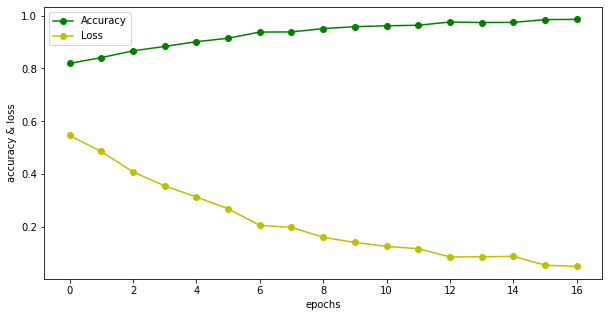

In [30]:
visualize_accuracy_loss(cnn_model_train)

In [36]:
# Predicting the images from pred_images dataset
from pathlib import Path

def load_pred_data(data_dir):
    images=[]
    for path in Path(data_dir).iterdir():
            if path.name.endswith('.jpg'):
                    img = cv2.imread(str(path))
                    img = cv2.resize(img,(50,50))
                    images.append(img)
    return images

pred_images = load_pred_data(pred_path)
pred_images = np.array(pred_images)
pred_images.shape

(7301, 50, 50, 3)

In [37]:
# predicting the image labels by using our trained cnn model

cnn_preds = cnn_model.predict(pred_images)
print('Prediction Shape is {}'.format(cnn_preds.shape))

229/229 [==============================] - 10s 41ms/step
Prediction Shape is (7301, 6)


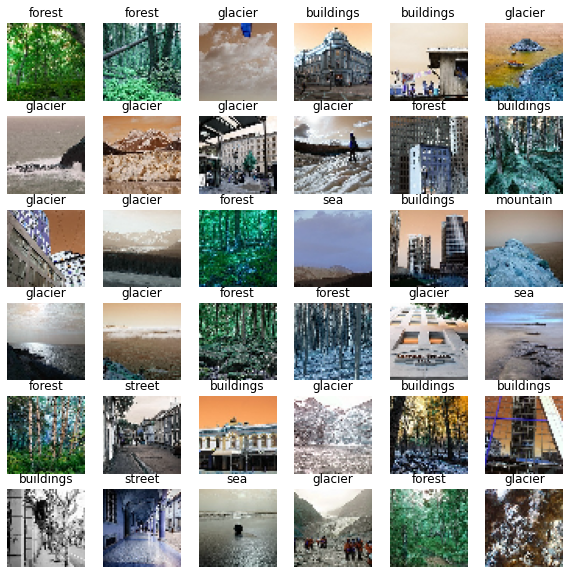

In [38]:
# displaying the outputs of our pred_data
class_label_data = dict([(value, key) for key, value in class_labels.items()])

plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(pred_images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(pred_images[i])    
    plt.axis('off')
    plt.title(class_label_data.get(np.argmax(cnn_preds[i])))

94/94 [==============================] - 4s 43ms/step


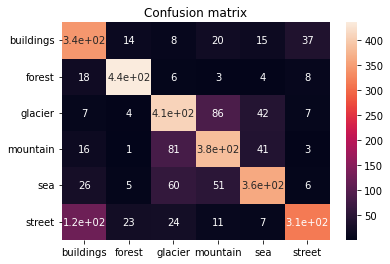

In [39]:
# Confusion Matrix 
import seaborn as sns
from sklearn.metrics import confusion_matrix

cnn_pred_stats = cnn_model.predict(X_test)
cnn_pred_labels = np.argmax(cnn_pred_stats, axis = 1)

CM = confusion_matrix(Y_test, cnn_pred_labels)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [47]:
#  transfer learning of a pretrained model from Alex Net

# importing necessary libraries
import torch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms  
import torchvision
from torchvision.transforms import ToTensor,Normalize, RandomHorizontalFlip, Resize
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torch.autograd import Variable

In [48]:
transform_train = torchvision.transforms.Compose([
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(0.3,0.4,0.4,0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.425, 0.415, 0.405), (0.205, 0.205, 0.205))
    ])

transform_tests = torchvision.transforms.Compose([
    transforms.Resize((150,150)),
    transforms.ToTensor(),
    transforms.Normalize((0.425, 0.415, 0.405), (0.255, 0.245, 0.235))
    ])

In [49]:
train_data = torchvision.datasets.ImageFolder(root=train_path,transform=transform_train)
test_data = torchvision.datasets.ImageFolder(root=test_path,transform=transform_tests)

In [50]:
valid_size = 0.15

train_len = len(train_data)
indices = list(range(train_len))
np.random.shuffle(indices)
split = int(np.floor(valid_size * train_len))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
classes=('buildings','forest','glacier','mountain','sea','street')

train_loader = DataLoader(train_data,batch_size=50,sampler=train_sampler,num_workers=2)
valid_loader = DataLoader(train_data, batch_size =100, sampler=valid_sampler, num_workers=3)
test_loader= DataLoader(test_data,batch_size=32,shuffle=False,num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


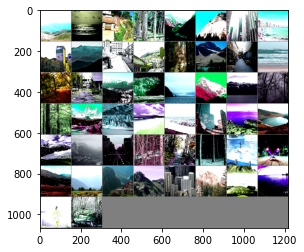

In [52]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize the image data
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

data_train = iter(train_loader)
images, labels = next(data_train)

imshow(torchvision.utils.make_grid(images))

In [55]:
device='cpu'

In [56]:
AlexNet_model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)
AlexNet_model.eval()
AlexNet_model.classifier[4] = nn.Linear(4096,1024)
AlexNet_model.classifier[6] = nn.Linear(1024,10)
AlexNet_model.eval()
AlexNet_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(AlexNet_model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        output = AlexNet_model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:    
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

Using cache found in C:\Users\puppa/.cache\torch\hub\pytorch_vision_v0.6.0


KeyboardInterrupt: 

In [57]:
# Accuracy for Alex Net

correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = AlexNet_model(images)
        data_op, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of AlexNet on the test data: %d %%' % (100 * correct / total))

Accuracy of AlexNet on the test data: 91 %


In [58]:
# Accuracy per class in AlexNet

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = AlexNet_model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(6):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of buildings : 82 %
Accuracy of forest : 98 %
Accuracy of glacier : 88 %
Accuracy of mountain : 91 %
Accuracy of   sea : 98 %
Accuracy of street : 86 %
